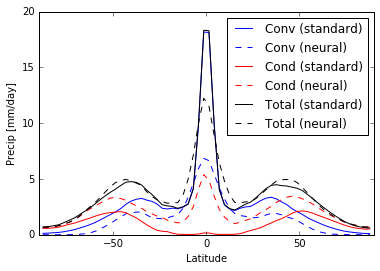

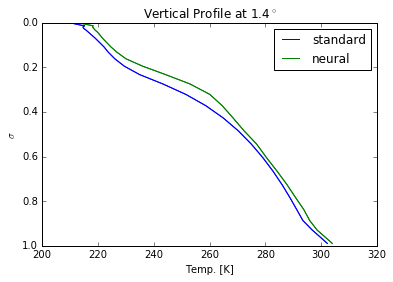

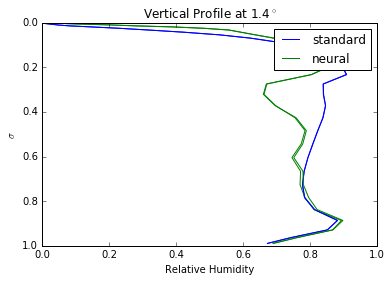

In [16]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline

experno= 'nowetconvection_abs1.0'
exper1 = 'del1.2_abs1.0_T42'
# exper2 = 'neural_del1.2_abs1.0_T42'
exper2 = 'neural_del1.2_abs1.0_T42_1262016incomplete_run'

# Define experiments
dno = sio.loadmat('/Users/jgdwyer/mitbox/scripts/nn/data/' \
                            + experno + '_climo.mat')
d1 = sio.loadmat('/Users/jgdwyer/mitbox/scripts/nn/data/' \
                            + exper1 + '_climo.mat')
d2 = sio.loadmat('/Users/jgdwyer/mitbox/scripts/nn/data/' \
                            + exper2 + '_climo.mat')
# Define levels for countour plots
clev={'u0':np.linspace(-10,45,11),
      'u1':np.linspace(-10,10,11),
      't0':np.linspace(220,305,11),
      't1':np.linspace(-5,5,11),
      'w0':np.linspace(-1e-6,1e-6,11),
      'w1':np.linspace(-1e-6,1e-6,11),
      'q0':np.linspace(0,.02,11),
      'q1':np.linspace(-.002,.002,11),
      'r0':np.linspace(0,1,11),
      'r1':np.linspace(-.3,.3,11),
      's0':np.linspace(-2e11,2e11,11),
      's1':np.linspace(-.6e11,.6e11,11),
      'b0':np.linspace(0,.018,11),
      'b1':np.linspace(-.003,.003,11),
      'vq0':np.linspace(-.075,.075,11),
      'vq1':np.linspace(-.045,.045,11),
      'thetae0':np.linspace(280,350,11),
      'thetae1':np.linspace(-10,10,11),
      'thetaes0':np.linspace(280,350,11),
      'thetaes1':np.linspace(-10,10,11)}
lat = np.squeeze(d1['lat'])
sigma = np.squeeze(d1['sigma'])
#lat = np.concatenate((-np.flipud(lat),lat),axis=0)
# Define dictionary of real variable names
vname = {'t':'Temp. [K]','u':'u [m/s]','w':r'$\omega$ [Pa/s]','q':'Humidity [kg/kg]',
         'rhum_avg':'Relative Humidity','stream':'Streamfunction [kg/s]',
         'buoyancy_freq':'Buoyancy Frequency [1/s]',
         'vq':'Mrdnl Flux of Spec. Hum. [m/s]',
         'theta_e':r'$\theta_e$ [K]','theta_e_sat':r'$\theta_e^*$ [K]'}

def plt_cntr(lat, sigma, data, ax, levels=None, titstr='', cmap=None):
    if cmap is None:
        cmap = plt.cm.viridis
    c=ax.contourf(lat, sigma, data, levels=levels, cmap=cmap)
    plt.ylim(1,0)
    #plt.xlim(0,90)
    plt.colorbar(c, ax=ax, orientation='horizontal')
    ax.set_title(titstr)
    
def plt_cntrs(var, lat, sigma, d1, d2, clev0, clev1, cmap0=None):
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharex=True,sharey=True, figsize=(10,5))
    plt_cntr(lat, sigma, d1[var].T, ax1, titstr=vname[var]+' standard', levels=clev0, cmap=cmap0)
    plt_cntr(lat, sigma, d2[var].T, ax2, titstr=vname[var]+' neural', levels=clev0, cmap=cmap0)
    plt_cntr(lat, sigma, d2[var].T - d1[var].T, ax3, titstr=vname[var]+' nrl-stndrd', 
             levels=clev1, cmap=plt.cm.BrBG)
    plt.savefig('../figs/climo/'+ var + '.eps', bbox_inches='tight')
    
def plt_cntrs_withdry(var, lat, sigma, d1, d2, dno, clev0, clev1, cmap0=None):
    f, axarr = plt.subplots(2,3,sharex=True,sharey=True, figsize=(10,5))
    plt_cntr(lat, sigma, dno[var].T, axarr[0,0], titstr=vname[var]+' no conv', levels=clev0, cmap=cmap0)
    plt_cntr(lat, sigma, d1[var].T, axarr[0,1], titstr=vname[var]+' standard', levels=clev0, cmap=cmap0)
    plt_cntr(lat, sigma, d2[var].T, axarr[0,2], titstr=vname[var]+' neural', levels=clev0, cmap=cmap0)
    # plot diffs
    plt_cntr(lat, sigma, dno[var].T - d1[var].T, axarr[1,0], 
             titstr=vname[var]+' noconv-stndrd', levels=clev1, cmap=plt.cm.BrBG)
    plt_cntr(lat, sigma, d2[var].T - d1[var].T,  axarr[1,2],
             titstr=vname[var]+' nrl-stndrd', levels=clev1, cmap=plt.cm.BrBG)
    axarr[1,1].axis('off')
    plt.savefig('../figs/climo/'+ var + '_noconv.eps', bbox_inches='tight')
    
def plt_all_cntrs():
    plt_cntrs_withdry('u', lat, sigma, d1, d2, dno, clev['u0'], clev['u1'])
    plt_cntrs_withdry('t', lat, sigma, d1, d2, dno, clev['t0'], clev['t1'])
    plt_cntrs_withdry('w', lat, sigma, d1, d2, dno, clev['w0'], clev['w1'])
    plt_cntrs_withdry('q', lat, sigma, d1, d2, dno, clev['q0'], clev['q1'])
    plt_cntrs_withdry('rhum_avg', lat, sigma, d1, d2, dno, clev['r0'], clev['r1'])
    plt_cntrs_withdry('stream', lat, sigma, d1, d2, dno, clev['s0'], clev['s1'],cmap0=plt.cm.BrBG)
    plt_cntrs_withdry('buoyancy_freq', lat, sigma, d1, d2, dno, clev['b0'], clev['b1'])
    plt_cntrs_withdry('vq', lat, sigma, d1, d2, dno, clev['vq0'], clev['vq1'],cmap0=plt.cm.BrBG)
    plt_cntrs_withdry('theta_e', lat, sigma, d1, d2, dno, clev['thetae0'], clev['thetae1'])
    plt_cntrs_withdry('theta_e_sat', lat, sigma, d1, d2, dno, clev['thetaes0'], clev['thetaes1'])
    
def plt_precip(lat, d1, d2):
    #f, ax = plt.figure(figsize=(10,5))
    plt.figure()
    plt.plot(lat, np.squeeze(d1['conv']), color='blue', ls='-', label='Conv (standard)')
    plt.plot(lat, np.squeeze(d2['conv']), color='blue', ls='--', label='Conv (neural)')
    plt.plot(lat, np.squeeze(d1['cond']), color='red',  ls='-', label='Cond (standard)')
    plt.plot(lat, np.squeeze(d2['cond']), color='red',  ls='--', label='Cond (neural)')
    plt.plot(lat, np.squeeze(d1['cond']+d1['conv']), color='k',  ls='-', label='Total (standard)')
    plt.plot(lat, np.squeeze(d2['cond']+d2['conv']), color='k',  ls='--', label='Total (neural)')
    plt.ylabel('Precip [mm/day]')
    plt.xlabel('Latitude')
    plt.xlim(-90,90)
    plt.legend()
    plt.savefig('../figs/climo/mean_precip.eps', bbox_inches='tight')
    
def plt_1d(lat, var, d1, d2, titstr, atsfc=False):
    plt.figure()
    v1=np.squeeze(d1[var])
    v2=np.squeeze(d2[var])
    if atsfc==True:
        v1=v1[:,-1]
        v2=v2[:,-1]
    plt.plot(lat, v1, label = 'standard')
    plt.plot(lat, v2, label = 'neural')
    plt.title(titstr)
    plt.xlim(-90,90)
    plt.legend()
    plt.savefig('../figs/climo/1d_'+var+'.eps', bbox_inches='tight')

# Make contour plots
plt_cntrs('u', lat, sigma, d1, d2, clev['u0'], clev['u1'])
plt_cntrs('t', lat, sigma, d1, d2, clev['t0'], clev['t1'])
plt_cntrs('w', lat, sigma, d1, d2, clev['w0'], clev['w1'])
plt_cntrs('q', lat, sigma, d1, d2, clev['q0'], clev['q1'])
plt_cntrs('rhum_avg', lat, sigma, d1, d2, clev['r0'], clev['r1'])
plt_cntrs('stream', lat, sigma, d1, d2, clev['s0'], clev['s1'],cmap0=plt.cm.BrBG)
plt_cntrs('buoyancy_freq', lat, sigma, d1, d2, clev['b0'], clev['b1'])
plt_cntrs('vq', lat, sigma, d1, d2, clev['vq0'], clev['vq1'],cmap0=plt.cm.BrBG)
plt_cntrs('theta_e', lat, sigma, d1, d2, clev['thetae0'], clev['thetae1'])
plt_cntrs('theta_e_sat', lat, sigma, d1, d2, clev['thetaes0'], clev['thetaes1'])
plt_all_cntrs()

# Make 1-d plots
plt_precip(lat,d1,d2)
plt_1d(lat, 'conv', d1, d2, 'Convective Precip')
plt_1d(lat, 't', d1, d2, 'Sfc. Temp.',atsfc=True)
plt_1d(lat, 'u', d1, d2, 'Sfc. Zonal Wind',atsfc=True)
plt_1d(lat, 'cond_q999', d1, d2, '99.9% Cond Intnsty')
plt_1d(lat, 'conv_q999', d1, d2, '99.9% Conv Intnsty')

def plt_vert(lev, var, d1, d2, titstr):
    latind=32
    plt.figure()
    plt.plot(np.squeeze(d1[var][latind,:]), lev, color='blue', label = 'standard')
    plt.plot(np.squeeze(d2[var][latind,:]), lev, color='green', label = 'neural')
    plt.plot(np.squeeze(d1[var][latind-1,:]), lev, color='blue')
    plt.plot(np.squeeze(d2[var][latind-1,:]), lev, color='green')
    plt.ylim(1,0)
    plt.ylabel(r'$\sigma$')
    plt.xlabel(vname[var])
    plt.title(titstr)
    plt.legend()
    plt.savefig('../figs/climo/vert_'+var+'.eps', bbox_inches='tight')



plt_vert(sigma, 't', d1, d2, r'Vertical Profile at 1.4$^\circ$')
plt_vert(sigma, 'rhum_avg', d1, d2, r'Vertical Profile at 1.4$^\circ$')



(0.0, 1.0, 0.0, 1.0)

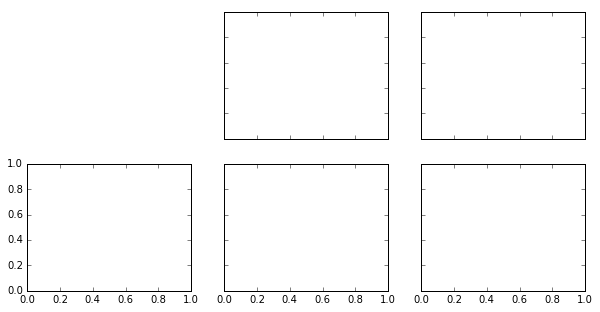

In [13]:
    f, axarr = plt.subplots(2,3,sharex=True,sharey=True, figsize=(10,5))
axarr[0,0].axis('off')


In [14]:
axarr[0,0].axis?

Object `axis` not found.


In [ ]:
axarr[0,0].axis

(0.0, 1.0, 0.0, 1.0)